In [1]:
# Esta parte es para los temas que utilizo así que comentelos
from jupyterthemes import jtplot
jtplot.style()

In [2]:
from libMLP import generateSets
from libMLP import modMLP
from libMLP import fitMLP
from libMLP import sMAPE
from libMLP import mAPE
from libMLP import graphPrediction
from libMLP import plotHistory
from libMLP import trainNoise
import numpy as np
import pandas as pd
from tensorflow import set_random_seed
from sklearn.preprocessing import MinMaxScaler
np.random.seed(42)
set_random_seed(42)

Using TensorFlow backend.


In [3]:
import os
comando = "PowerShell -Command \"Add-Type -AssemblyName System.Speech; (New-Object System.Speech.Synthesis.SpeechSynthesizer).Speak('Ya termine de entrenar');\" "

In [16]:
m = 7
minimo = 13.2
maximo = 29

## Lectura de datos

In [5]:
matrizDiseño = pd.read_csv('MatDis/1_temperature_Matrix.csv')
#matrizDiseño = pd.read_csv('MatDis/2_temperature_subsampled_Matrix.csv')
#matrizDiseño = pd.read_csv('MatDis/3_passengers_Matrix.csv') 
#matrizDiseño = pd.read_csv('MatDis/4_irradiance_Matrix.csv') 
#matrizDiseño = pd.read_csv('MatDis/5_irradiance_subsampled_Matrix.csv')
#matrizDiseño = pd.read_csv('MatDis/6_sunspots_Matrix.csv')
#matrizDiseño = pd.read_csv('MatDis/7_distribution_subsampled_norm_Matrix.csv')
#matrizDiseño = pd.read_csv('MatDis/8_active_power_Matrix.csv')
matrizDiseño.shape

(1524, 8)

## División y estandarización de datos

In [6]:
X_train, X_val, X_test, y_train, y_val, y_test=generateSets(matrizDiseño, test_siz=0.3, val_size=0.2)

## Ruido (en las pruebas que sea necesario)

In [7]:
#X_train_e, y_train_e = trainNoise('MatDis/7_distribution_subsampled_norm_All.csv',X_train.copy(), y_train.copy(), SNR_dB=40, NUMREP=33)

## MLP

In [8]:
neuronas = [128,256, 512, 512, 256, 256]   # Número de neuronas por capa
activations = ['relu', 'relu', 'relu', 'relu', 'relu', 'relu'] # funciónes de activación de cada capa

model = modMLP(neuronas, activations, m)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "forecasting"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 7)]               0         
_________________________________________________________________
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
________________________________________

## Entrenamiento

In [9]:
%%time
history = fitMLP(model, X_train, y_train, X_val, y_val, X_test, y_test, epoc=100, patien=-1)
os.system(comando)

Train on 852 samples, validate on 214 samples
Epoch 1/100
852/852 [==============================] - 1s 704us/sample - loss: 0.0675 - mean_absolute_error: 0.1985 - mean_squared_error: 0.0675 - val_loss: 0.0191 - val_mean_absolute_error: 0.1143 - val_mean_squared_error: 0.0191
Epoch 2/100
852/852 [==============================] - 0s 164us/sample - loss: 0.0140 - mean_absolute_error: 0.0937 - mean_squared_error: 0.0140 - val_loss: 0.0145 - val_mean_absolute_error: 0.0958 - val_mean_squared_error: 0.0145
Epoch 3/100
852/852 [==============================] - 0s 141us/sample - loss: 0.0131 - mean_absolute_error: 0.0880 - mean_squared_error: 0.0131 - val_loss: 0.0100 - val_mean_absolute_error: 0.0791 - val_mean_squared_error: 0.0100
Epoch 4/100
852/852 [==============================] - 0s 145us/sample - loss: 0.0116 - mean_absolute_error: 0.0819 - mean_squared_error: 0.0116 - val_loss: 0.0093 - val_mean_absolute_error: 0.0756 - val_mean_squared_error: 0.0093
Epoch 5/100
852/852 [=========

852/852 [==============================] - 0s 145us/sample - loss: 0.0041 - mean_absolute_error: 0.0435 - mean_squared_error: 0.0041 - val_loss: 0.0039 - val_mean_absolute_error: 0.0435 - val_mean_squared_error: 0.0039
Epoch 37/100
852/852 [==============================] - 0s 122us/sample - loss: 0.0042 - mean_absolute_error: 0.0445 - mean_squared_error: 0.0042 - val_loss: 0.0038 - val_mean_absolute_error: 0.0462 - val_mean_squared_error: 0.0038
Epoch 38/100
852/852 [==============================] - 0s 117us/sample - loss: 0.0038 - mean_absolute_error: 0.0432 - mean_squared_error: 0.0038 - val_loss: 0.0039 - val_mean_absolute_error: 0.0447 - val_mean_squared_error: 0.0039
Epoch 39/100
852/852 [==============================] - 0s 136us/sample - loss: 0.0032 - mean_absolute_error: 0.0378 - mean_squared_error: 0.0032 - val_loss: 0.0034 - val_mean_absolute_error: 0.0406 - val_mean_squared_error: 0.0034
Epoch 40/100
852/852 [==============================] - 0s 113us/sample - loss: 0.003

852/852 [==============================] - 0s 127us/sample - loss: 0.0020 - mean_absolute_error: 0.0317 - mean_squared_error: 0.0020 - val_loss: 0.0021 - val_mean_absolute_error: 0.0315 - val_mean_squared_error: 0.0021
Epoch 72/100
852/852 [==============================] - 0s 127us/sample - loss: 0.0018 - mean_absolute_error: 0.0300 - mean_squared_error: 0.0018 - val_loss: 0.0032 - val_mean_absolute_error: 0.0442 - val_mean_squared_error: 0.0032
Epoch 73/100
852/852 [==============================] - 0s 131us/sample - loss: 0.0017 - mean_absolute_error: 0.0300 - mean_squared_error: 0.0017 - val_loss: 0.0024 - val_mean_absolute_error: 0.0338 - val_mean_squared_error: 0.0024
Epoch 74/100
852/852 [==============================] - 0s 183us/sample - loss: 0.0018 - mean_absolute_error: 0.0300 - mean_squared_error: 0.0018 - val_loss: 0.0025 - val_mean_absolute_error: 0.0358 - val_mean_squared_error: 0.0025
Epoch 75/100
852/852 [==============================] - 0s 155us/sample - loss: 0.001

0

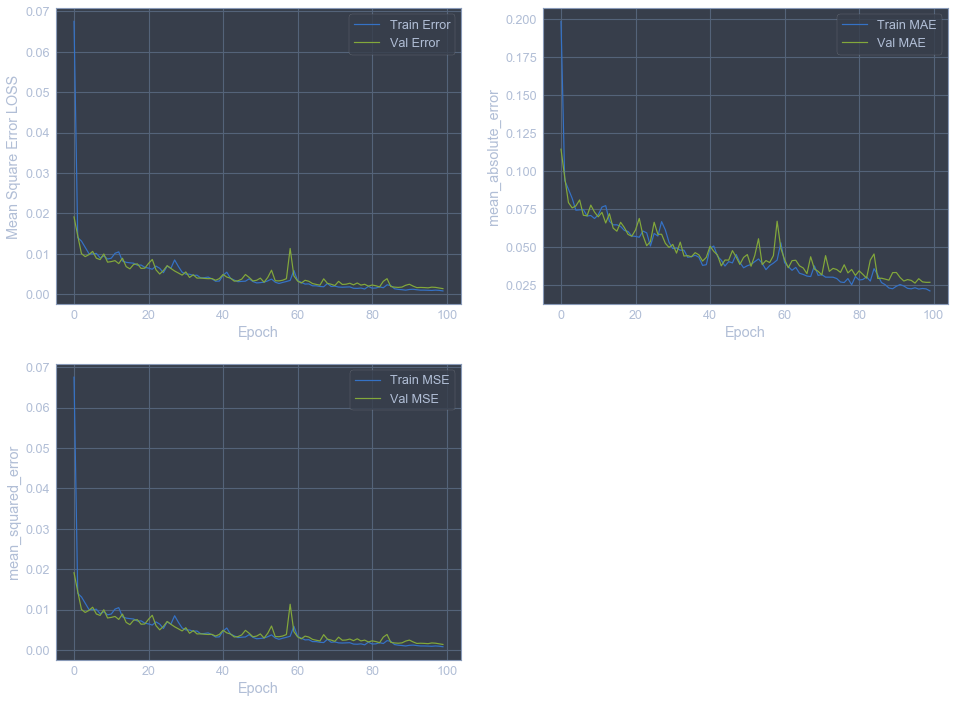

In [10]:
plotHistory(history)

## Predicción

In [17]:
y_predic= model.predict(X_test)

scaler = MinMaxScaler(feature_range=(minimo, maximo))

y_p = scaler.transform(y_predic)
y_t = scaler.transform(y_test)

MinMaxScaler(copy=True, feature_range=(13.2, 29))


In [12]:
print("SMAPE: ",sMAPE(y_t, y_p))
print("MAPE: ",mAPE(y_t, y_p))

SMAPE:  1.1649073066246087
MAPE:  2.3357646639168244


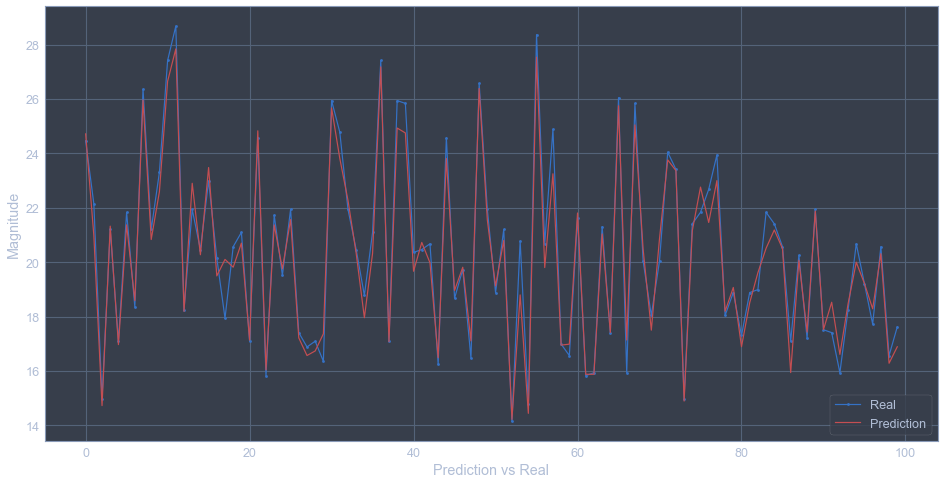

In [13]:
graphPrediction(y_t, y_p, samples=100)

In [14]:
model.save('modelo.h5')